#### CASE STUDY: 

The study of handwritten digits character recognition, also known as optical character
recognition (OCR), is important for several reasons including document digitization, form
processing, banking and finance, handwritten-based user authentication and so on. 

The task here is to correctly classify the handwritten digits in the MNIST dataset using Convolutional
Neural Network (CNN). The dataset can be found at: http://yann.lecun.com/exdb/mnist/

Based on this task, consider the following questions:
a) How did the use of different regularisation methods affect the performance of your CNN model?
b) How changes to the number of convolution blocks affect the performance of
the model quantitatively.
c) What is the effect of varying learning rates on the performance of the CNN algorithm.

**Import all the required libraries**

In [77]:
# import necessary libraries
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD


**Load the dataset**

In [78]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


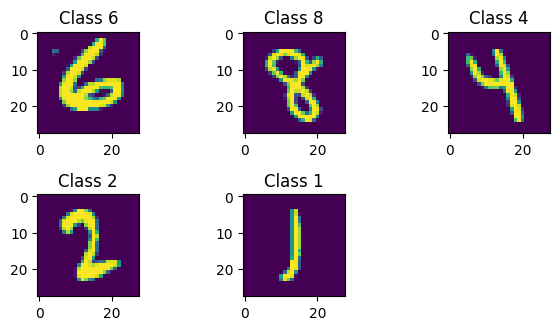

In [79]:
for i in range(5):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(x_train))
    plt.imshow(x_train[num],  interpolation='none')
    #  plt.imshow(x_train[num], cmap='gray' interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

In [80]:
#View the different unique values in the target set
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [81]:
 # Check the shape of one of the train images (length, width, channel)
x_train[1].shape

(28, 28)

In [82]:
x_train[1].shape # This shows the shape of one of the train images (length, width, channel)


(28, 28)

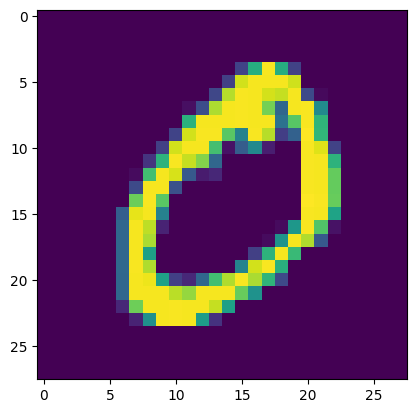

In [83]:
plt.imshow(x_train[1])

In [84]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [85]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [86]:
y_train.shape


(60000,)

**Data preprocessing**

In [87]:
# Normalize pixel values to range 0-1
# the pixel values in an image typically range from 0 to 255
# 1dividing all pixel values by 255 brings the pixel values to the range between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [88]:
#Reshaping the data to include the color channel
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [89]:
x_train[1].shape

(28, 28, 1)

In [90]:
# Define data augmentation parameters for training set
train_datagen = ImageDataGenerator(
 rotation_range=20, # Randomly rotate images up to 10 degrees
 width_shift_range=0.1, # Randomly shift images horizontally up to 10% of the width
 height_shift_range=0.1, # Randomly shift images vertically up to 10% of the height
 horizontal_flip=True, # Randomly flip images horizontally
 vertical_flip=False, # Don't randomly flip images vertically
 shear_range=0.10, # crops part of the image
 zoom_range=0.10 # #zooms the image by 10%
)

In [91]:
# Fit the transformation to the training dataset
train_datagen.fit(x_train)


In [92]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

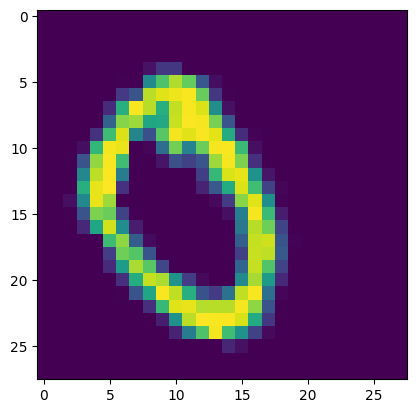

In [93]:
# showing sample of a transformation
plt.imshow(train_datagen.random_transform(x_train[1]))

**Model Architecture**

Using Dropout Regularizer with;
 0.5 dropouts, 0.001 learning rate, and 3 Convo blocks, Epock=20.

In [119]:
# Define the CNN architecture
# Conv2D(filters=32,kernel_size=(3, 3) means use 32 filters (also called kernels) of size 3x3
# input_shape=(32, 32, 3) means the input data is a 3D tensor with dimensions 32x32x3.(height x width x
# The first dimension of the tensor (32) is the height of the image.
#The second dimension of the tensor (32) is the width of the image.
#The third dimension of the tensor (3) is the number of channels in the image (Red, Green, Blue colo
# The MaxPooling2D(2, 2) performs a pooling operation where the (2,2) argument indicates the size of the
# It reduces the spatial size of the feature maps and prevent overfitting
# The output of the convolutional and pooling layers is a 3D tensor;
# The Flatten() layer takes 3D tensor (height, width, channels) and reshapes it into a 1D array;
# The output of the convolutional and pooling layers is a 3D tensor;
# 1D array is required by the fully connected (dense) layers;
# Flatten() later enables the transition from the convolutional and pooling layers to the fully conn

model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


#model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation = 'softmax'))

In [120]:
# print the summary of the model constructed
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 2, 2, 128)       

**Compilation stage**

In [ ]:
# Compile the model with categorical cross-entropy loss and SGD optimizer
#categorical_crossentropy - loss function during model training
#accuracy - Evaluation measure
#SGD - Stochastic Gradient Descent
# learning_rate=0.001 specifies the step size of the updates to the weights during training.
# momentum=0.9 is a parameter that helps the optimizer to accelerate in the direction of the gradient an
# Higher values of momentum allow the optimizer to move more smoothly towards the global minimum
 # and reduce the chance of getting stuck in local minima.
#model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy', metrics['accuracy'])

model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])


**Training and Evaluation**

In [ ]:
# Train the model with 20 epochs and batch size of 32
# to_categorical () converts integer class labels into one-hot encoded vectors;
# also used to convert predicted scores back into class labels for evaluation in classification problems
# batch_size=32: the training dataset is put into mini-batches of size 32.
#epochs=20: The model will be trained for 20 epochs;
#This means the dataset will be passed through the model 20 times for training.
history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),
 epochs=20, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/20
1875/1875 [==============================] - 125s 66ms/step - loss: 0.4860 - accuracy: 0.8474 - val_loss: 0.1227 - val_accuracy: 0.9619
Epoch 2/20
1875/1875 [==============================] - 137s 73ms/step - loss: 0.2032 - accuracy: 0.9388 - val_loss: 0.0856 - val_accuracy: 0.9725
Epoch 3/20
1875/1875 [==============================] - 119s 64ms/step - loss: 0.1532 - accuracy: 0.9528 - val_loss: 0.0837 - val_accuracy: 0.9722
Epoch 4/20
1875/1875 [==============================] - 118s 63ms/step - loss: 0.1304 - accuracy: 0.9607 - val_loss: 0.0780 - val_accuracy: 0.9760
Epoch 5/20
1875/1875 [==============================] - 119s 63ms/step - loss: 0.1164 - accuracy: 0.9642 - val_loss: 0.0984 - val_accuracy: 0.9695
Epoch 6/20
1875/1875 [==============================] - 120s 64ms/step - loss: 0.1075 - accuracy: 0.9662 - val_loss: 0.0625 - val_accuracy: 0.9806
Epoch 7/20
1875/1875 [==============================] - 118s 63ms/step - loss: 0.0987 - accuracy: 0.9689 - val_loss: 0

**checking for overfitting**

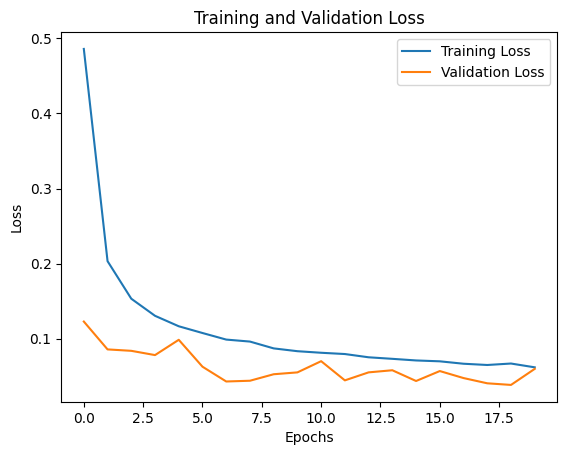

In [108]:
## checking for overfitting
# Plot training loss against validation loss
#Plots the training loss as a line with label "Training Loss".
loss = plt.plot(history.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
Accuracy = plt.plot(history.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.

plt.show()

# plt.savefig("loss_10EP_0.001_LR", "./")

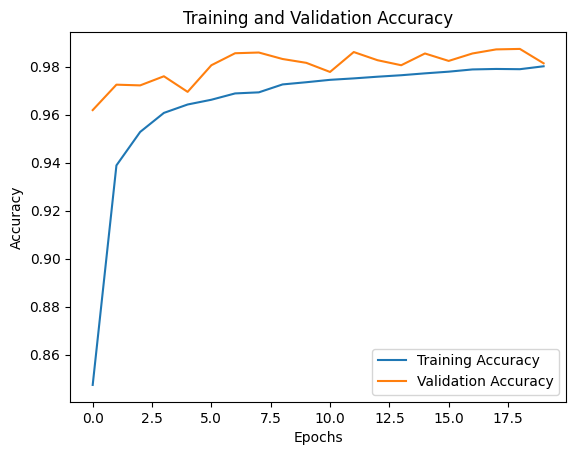

In [109]:
# Plot training and validation accuracy
#Plots the training accuracy as a line with label "Training Accuracy".
plt.plot(history.history['accuracy'], label='Training Accuracy')
#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#Sets the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

# plt.savefig("Accuracy_10EP_0.001_LR", "./")

**Make predictions**

In [110]:
# Predict the classes of the test set
#np.argmax(model.predict(x_test), axis=-1),
#this means that the argmax operation will be applied to the output predictions of the model along the l
#this is the class probabilities for each test instance.
# argmax returns the class with the largest predicted probability.
y_pred = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 6s 18ms/step


**Visualisation**

In [111]:
from sklearn.metrics import classification_report
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.96      0.97      0.97      1032
           3       0.95      1.00      0.97      1010
           4       0.98      1.00      0.99       982
           5       0.98      0.97      0.97       892
           6       0.98      0.97      0.98       958
           7       0.98      1.00      0.99      1028
           8       1.00      0.96      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



<Figure size 2000x3000 with 0 Axes>

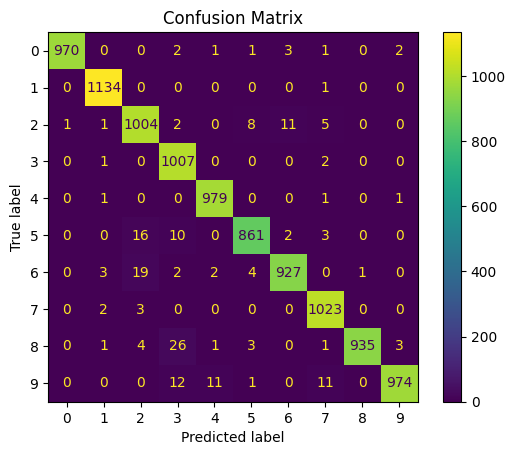

In [118]:
# Print the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay


plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.title('Confusion Matrix')
plt.show()

# plt.savefig("Confusion_Matrix_10EP_0.001_LR", "./")

Using Dropout Regularizer with;
 0.5 dropouts, 0.0013 learning rate, and 3 Convo blocks, Epock=10.

In [138]:
# Define the CNN architecture

model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


#model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation = 'softmax'))

In [139]:
# print the summary of the model constructed
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 2, 2, 128)       

**Compilation stage**

In [140]:
# Compile the model with categorical cross-entropy loss and SGD optimizer

model.compile(optimizer=SGD(learning_rate=0.0013, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])


**Training and Evaluation**

In [141]:
# Train the model with 20 epochs and batch size of 32

history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),
 epochs=10, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/10
1875/1875 [==============================] - 115s 61ms/step - loss: 1.4110 - accuracy: 0.5101 - val_loss: 0.4022 - val_accuracy: 0.8548
Epoch 2/10
1875/1875 [==============================] - 113s 60ms/step - loss: 0.6488 - accuracy: 0.7839 - val_loss: 0.2190 - val_accuracy: 0.9347
Epoch 3/10
1875/1875 [==============================] - 113s 60ms/step - loss: 0.4698 - accuracy: 0.8483 - val_loss: 0.1661 - val_accuracy: 0.9469
Epoch 4/10
1875/1875 [==============================] - 116s 62ms/step - loss: 0.3809 - accuracy: 0.8809 - val_loss: 0.1093 - val_accuracy: 0.9644
Epoch 5/10
1875/1875 [==============================] - 114s 61ms/step - loss: 0.3186 - accuracy: 0.9009 - val_loss: 0.0889 - val_accuracy: 0.9700
Epoch 6/10
1875/1875 [==============================] - 113s 60ms/step - loss: 0.2844 - accuracy: 0.9114 - val_loss: 0.0926 - val_accuracy: 0.9680
Epoch 7/10
1875/1875 [==============================] - 114s 61ms/step - loss: 0.2558 - accuracy: 0.9224 - val_loss: 0

**checking for overfitting**

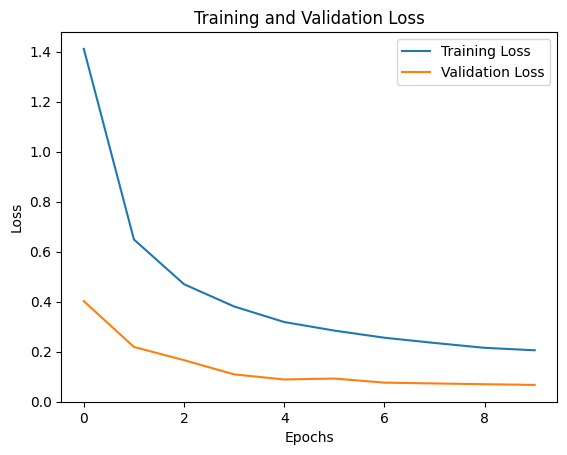

In [142]:
## checking for overfitting
# Plot training loss against validation loss
#Plots the training loss as a line with label "Training Loss".
loss = plt.plot(history.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
Accuracy = plt.plot(history.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.

plt.show()

# plt.savefig("loss_10EP_0.001_LR", "./")

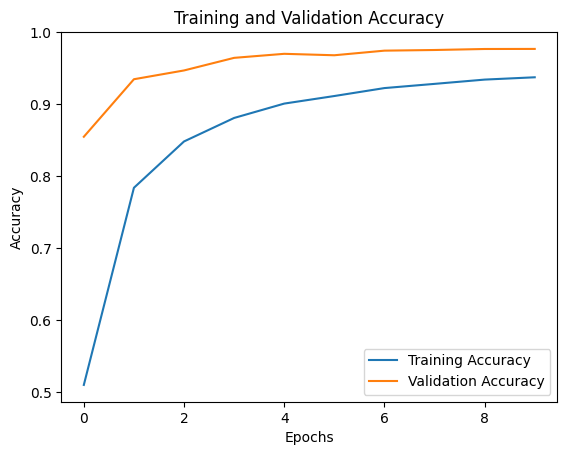

In [144]:
# Plot training and validation accuracy
#Plots the training accuracy as a line with label "Training Accuracy".
plt.plot(history.history['accuracy'], label='Training Accuracy')
#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#Sets the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

# plt.savefig("Accuracy_10EP_0.001_LR", "./")

**Make predictions**

In [145]:
# Predict the classes of the test set

y_pred = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 4s 13ms/step


**Visualisation**

In [146]:
from sklearn.metrics import classification_report
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.95      0.98      0.96      1032
           3       0.96      0.99      0.98      1010
           4       0.98      0.99      0.98       982
           5       0.97      0.95      0.96       892
           6       0.98      0.96      0.97       958
           7       0.97      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



<Figure size 2000x3000 with 0 Axes>

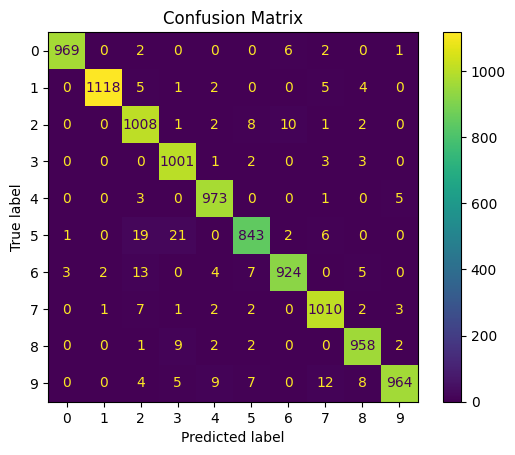

In [147]:
# Print the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.title('Confusion Matrix')
plt.show()

# plt.savefig("Confusion_Matrix_10EP_0.001_LR", "./")

**Training and Evaluation**

Using BatchNormalization Regularizer with; SGD optimizer
0.001 learning rate, and 3 Convo blocks, Epock-10

In [165]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
# model.add(Dropout(0.5))
model.add(Dense(10,activation = 'softmax'))

#Model compilation
model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])


In [167]:
#Training and evaluating the model
history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),
epochs=10, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/10
1875/1875 [==============================] - 117s 62ms/step - loss: 0.5324 - accuracy: 0.8321 - val_loss: 0.1379 - val_accuracy: 0.9586
Epoch 2/10
1875/1875 [==============================] - 116s 62ms/step - loss: 0.2246 - accuracy: 0.9311 - val_loss: 0.1071 - val_accuracy: 0.9670
Epoch 3/10
1875/1875 [==============================] - 116s 62ms/step - loss: 0.1698 - accuracy: 0.9479 - val_loss: 0.1533 - val_accuracy: 0.9515
Epoch 4/10
1875/1875 [==============================] - 117s 63ms/step - loss: 0.1437 - accuracy: 0.9549 - val_loss: 0.0867 - val_accuracy: 0.9699
Epoch 5/10
1875/1875 [==============================] - 117s 62ms/step - loss: 0.1286 - accuracy: 0.9600 - val_loss: 0.0678 - val_accuracy: 0.9791
Epoch 6/10
1875/1875 [==============================] - 115s 61ms/step - loss: 0.1146 - accuracy: 0.9643 - val_loss: 0.0555 - val_accuracy: 0.9837
Epoch 7/10
1875/1875 [==============================] - 116s 62ms/step - loss: 0.1051 - accuracy: 0.9670 - val_loss: 0

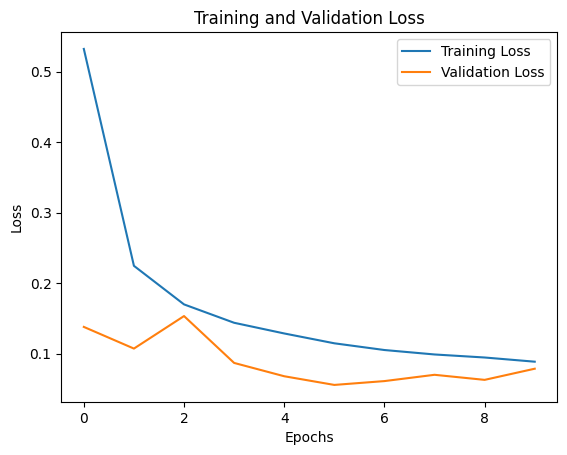

In [168]:
## checking for overfitting

loss = plt.plot(history.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
Accuracy = plt.plot(history.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.

plt.show()


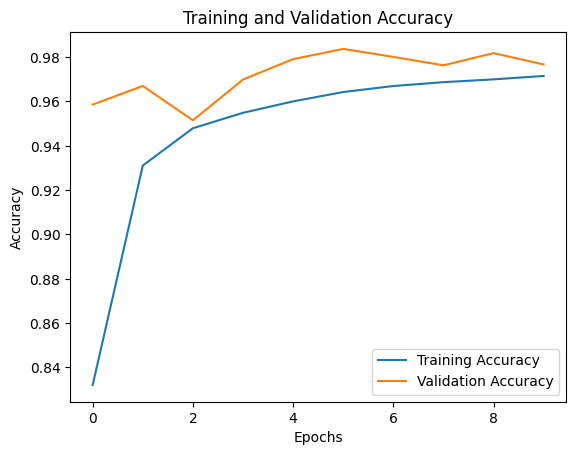

In [169]:
# Plot training and validation accuracy
#Plots the training accuracy as a line with label "Training Accuracy".
plt.plot(history.history['accuracy'], label='Training Accuracy')
#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#Sets the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()


**Make predictions**

In [170]:
# Predict the classes of the test set
y_pred = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 7s 21ms/step


**Visualisation**

In [171]:
from sklearn.metrics import classification_report
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       980
           1       1.00      0.96      0.98      1135
           2       0.94      0.99      0.97      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.95      0.97       958
           7       0.99      0.97      0.98      1028
           8       0.92      1.00      0.96       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



<Figure size 2000x3000 with 0 Axes>

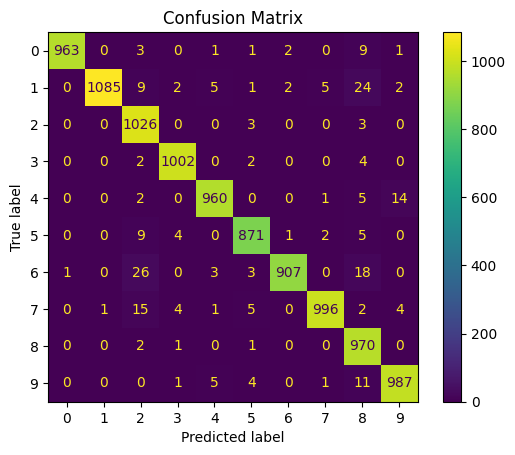

In [172]:
# Print the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay


plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.title('Confusion Matrix')
plt.show()

# plt.savefig("Confusion_Matrix_10EP_0.001_LR", "./")

**Using BatchNormalization Regularizer with; 0.0013 learning rate, and 3 Convo blocks, Epock-10**




In [174]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
# model.add(Dropout(0.5))
model.add(Dense(10,activation = 'softmax'))

#Model compilation
model.compile(optimizer=SGD(learning_rate=0.0013, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])


In [175]:
#Training and evaluating the model
history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),
epochs=10, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/10
1875/1875 [==============================] - 123s 64ms/step - loss: 0.4758 - accuracy: 0.8479 - val_loss: 0.1879 - val_accuracy: 0.9405
Epoch 2/10
1875/1875 [==============================] - 123s 65ms/step - loss: 0.2021 - accuracy: 0.9369 - val_loss: 0.0803 - val_accuracy: 0.9767
Epoch 3/10
1875/1875 [==============================] - 118s 63ms/step - loss: 0.1500 - accuracy: 0.9531 - val_loss: 0.0690 - val_accuracy: 0.9778
Epoch 4/10
1875/1875 [==============================] - 120s 64ms/step - loss: 0.1288 - accuracy: 0.9592 - val_loss: 0.0732 - val_accuracy: 0.9763
Epoch 5/10
1875/1875 [==============================] - 118s 63ms/step - loss: 0.1130 - accuracy: 0.9640 - val_loss: 0.0621 - val_accuracy: 0.9798
Epoch 6/10
1875/1875 [==============================] - 116s 62ms/step - loss: 0.1027 - accuracy: 0.9674 - val_loss: 0.0437 - val_accuracy: 0.9853
Epoch 7/10
1875/1875 [==============================] - 116s 62ms/step - loss: 0.0945 - accuracy: 0.9698 - val_loss: 0

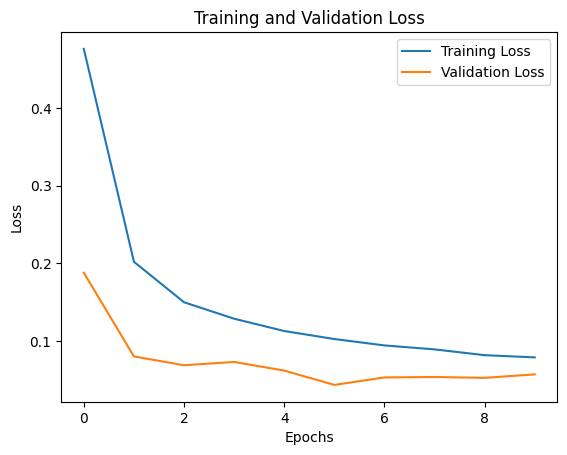

In [176]:
## checking for overfitting

loss = plt.plot(history.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
Accuracy = plt.plot(history.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.

plt.show()


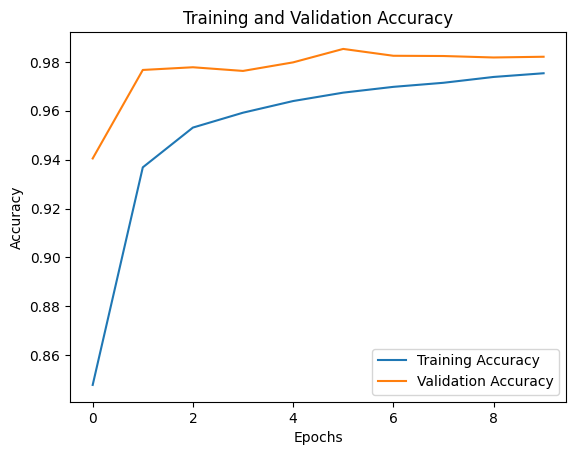

In [177]:
# Plot training and validation accuracy
#Plots the training accuracy as a line with label "Training Accuracy".
plt.plot(history.history['accuracy'], label='Training Accuracy')
#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#Sets the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()


**Make predictions**

In [178]:
# Predict the classes of the test set

y_pred = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 6s 19ms/step


**Visualisation**

<Figure size 2000x3000 with 0 Axes>

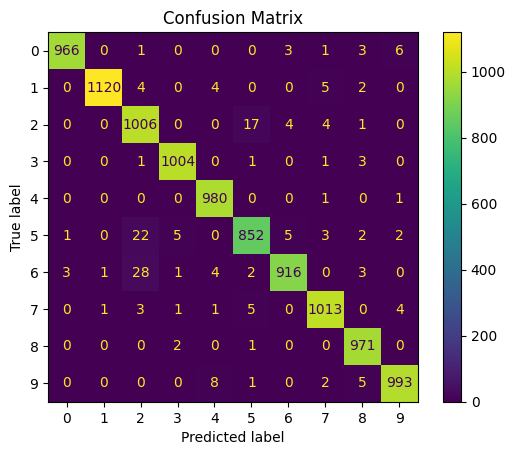

In [181]:
# Print the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay


plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.title('Confusion Matrix')
plt.show()

# plt.savefig("Confusion_Matrix_10EP_0.001_LR", "./")

**QST B**

In [189]:
# Define the CNN architecture

from keras.layers import ZeroPadding2D

model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(ZeroPadding2D(padding=((1, 1), (1, 1))))


model.add(Conv2D(filters=256,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation = 'softmax'))

In [190]:
# print the summary of the model constructed
model.summary()


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_48 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 2, 2, 128)      

**Compilation stage**

In [191]:
# Compile the model with categorical cross-entropy loss and SGD optimizer
#categorical_crossentropy - loss function during model training
#accuracy - Evaluation measure
#SGD - Stochastic Gradient Descent
# learning_rate=0.001 specifies the step size of the updates to the weights during training.
# momentum=0.9 is a parameter that helps the optimizer to accelerate in the direction of the gradient an
# Higher values of momentum allow the optimizer to move more smoothly towards the global minimum
 # and reduce the chance of getting stuck in local minima.
#model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy', metrics['accuracy'])

model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])


**Training and Evaluation**

In [192]:
# Train the model with 20 epochs and batch size of 32
# to_categorical () converts integer class labels into one-hot encoded vectors;
# also used to convert predicted scores back into class labels for evaluation in classification problems
# batch_size=32: the training dataset is put into mini-batches of size 32.
#epochs=20: The model will be trained for 20 epochs;
#This means the dataset will be passed through the model 20 times for training.
history=model.fit(train_datagen.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),
 epochs=15, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/15
1875/1875 [==============================] - 171s 91ms/step - loss: 1.4690 - accuracy: 0.4967 - val_loss: 0.3992 - val_accuracy: 0.8678
Epoch 2/15
1875/1875 [==============================] - 170s 91ms/step - loss: 0.5918 - accuracy: 0.8055 - val_loss: 0.2116 - val_accuracy: 0.9299
Epoch 3/15
1875/1875 [==============================] - 165s 88ms/step - loss: 0.4010 - accuracy: 0.8744 - val_loss: 0.1313 - val_accuracy: 0.9548
Epoch 4/15
1875/1875 [==============================] - 175s 93ms/step - loss: 0.3070 - accuracy: 0.9058 - val_loss: 0.1098 - val_accuracy: 0.9609
Epoch 5/15
1875/1875 [==============================] - 173s 92ms/step - loss: 0.2570 - accuracy: 0.9221 - val_loss: 0.0900 - val_accuracy: 0.9684
Epoch 6/15
1875/1875 [==============================] - 172s 91ms/step - loss: 0.2284 - accuracy: 0.9302 - val_loss: 0.1061 - val_accuracy: 0.9647
Epoch 7/15
1875/1875 [==============================] - 171s 91ms/step - loss: 0.2033 - accuracy: 0.9380 - val_loss: 0

**checking for overfitting**

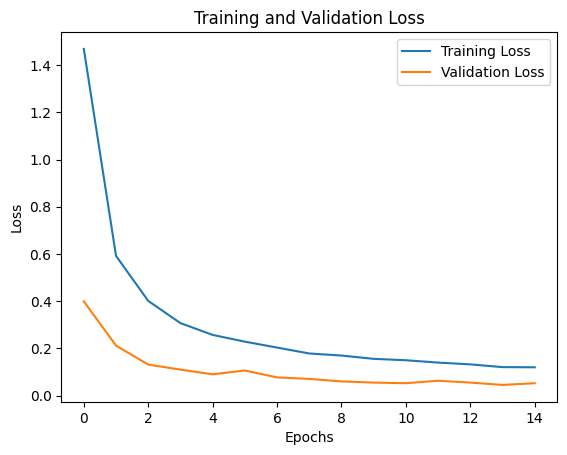

In [193]:
## checking for overfitting
# Plot training loss against validation loss
#Plots the training loss as a line with label "Training Loss".
loss = plt.plot(history.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
Accuracy = plt.plot(history.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.

plt.show()

# plt.savefig("loss_10EP_0.001_LR", "./")

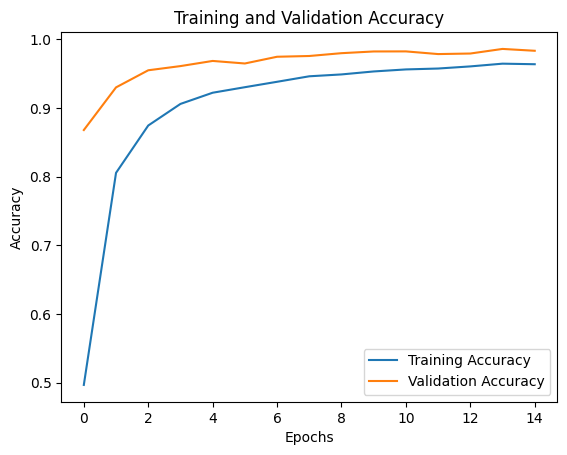

In [194]:
# Plot training and validation accuracy
#Plots the training accuracy as a line with label "Training Accuracy".
plt.plot(history.history['accuracy'], label='Training Accuracy')
#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#Sets the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

# plt.savefig("Accuracy_10EP_0.001_LR", "./")

**Make predictions**

In [195]:
# Predict the classes of the test set
#np.argmax(model.predict(x_test), axis=-1),
#this means that the argmax operation will be applied to the output predictions of the model along the l
#this is the class probabilities for each test instance.
# argmax returns the class with the largest predicted probability.
y_pred = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 6s 19ms/step


**Visualisation**

In [196]:
from sklearn.metrics import classification_report
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.97      0.96      0.96      1032
           3       0.99      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.96      0.97      0.96       892
           6       0.99      0.97      0.98       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



<Figure size 2000x3000 with 0 Axes>

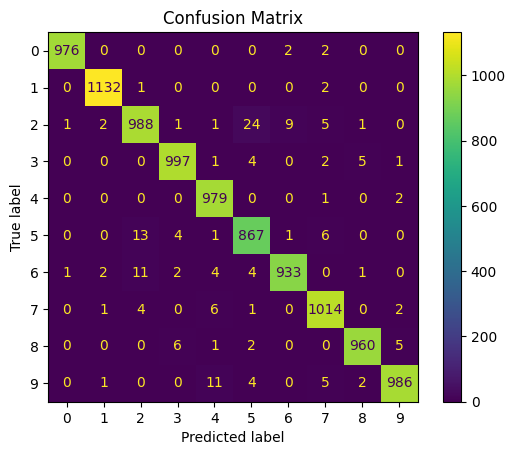

In [197]:
# Print the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay


plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.title('Confusion Matrix')
plt.show()

# plt.savefig("Confusion_Matrix_10EP_0.001_LR", "./")